# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
# read csv from a link and seperate columns by tab space
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items bought

In [4]:
#group by the 'item_name' then sum up all the quantities
#sort thru the quantities in descending order 
#so we have the top five items bought on top
#save it to a dataframe called top_items
top_items = chipo.groupby('item_name').sum().sort_values('quantity',ascending=False)
#resetting the index so item_name is a column
top_items.reset_index(level=0, inplace=True)
#selecting the top five most items
top_five = top_items[:5]
top_five

,item_name,order_id,quantity
0,Chicken Bowl,713926,761
1,Chicken Burrito,497303,591
2,Chips and Guacamole,449959,506
3,Steak Burrito,328437,386
4,Canned Soft Drink,304753,351


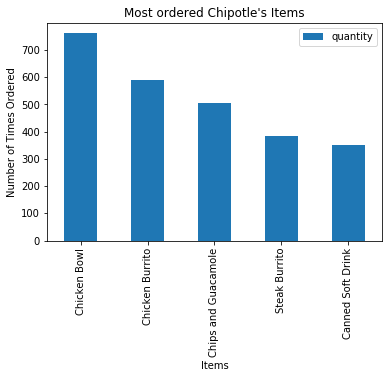

In [5]:
#creating a bar graph with 'item_name' and 'quantity'
top_five.plot('item_name', 'quantity', kind='bar')
#labeling x-axis
plt.xlabel('Items')
#labeling y-axis
plt.ylabel('Number of Times Ordered')
#giving the graph a title
plt.title('Most ordered Chipotle\'s Items')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
#'item_price' is an object so we have to change it to a float
#we will take the second value all the way until the last to
#change into float(deleting the $)
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]
# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

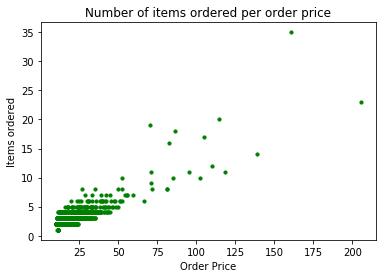

In [12]:
#s = size, c = color
plt.scatter(x = orders.item_price, y = orders.quantity, s = 10, c = 'green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.show()